In [ ]:
# prompt: MOUNT DRIVE

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!cp -r '/content/drive/My Drive/obesity' '/content'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: display the file in obesity folder

!ls /content/obesity


 test.csv  'train.csv (1)'


In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
for dirname, _, filenames in os.walk('/content/obesity'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/obesity/test.csv/test.csv
/content/obesity/train.csv (1)/train.csv


In [ ]:
train_df = pd.read_csv('/content/obesity/train.csv (1)/train.csv', index_col=[0])
test_df = pd.read_csv('/content/obesity/test.csv/test.csv')

ids = test_df['id']
test_df = test_df.drop('id', axis=1)

train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train_df.rename(columns={'family_history_with_overweight': 'family_history'}, inplace=True)
test_df.rename(columns={'family_history_with_overweight': 'family_history'}, inplace=True)
train_df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## PREPROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

num_cols = train_df.select_dtypes(include = 'number').columns
cat_cols = train_df.drop('NObeyesdad', axis=1).select_dtypes(include = 'object').columns

scaler = MinMaxScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.fit_transform(test_df[num_cols])

encoder = LabelEncoder()
train_df[cat_cols] = train_df[cat_cols].apply(encoder.fit_transform)
test_df[cat_cols] = test_df[cat_cols].apply(encoder.fit_transform)

train_df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,1,0.222192,0.475586,0.338497,1,1,0.500000,0.661099,2,0,0.881787,0,0.000000,0.488237,1,3,Overweight_Level_II
1,0,0.085106,0.209260,0.142792,1,1,0.500000,0.666667,1,0,0.500000,0,0.333333,0.500000,2,0,Normal_Weight
2,0,0.085106,0.497391,0.088577,1,1,0.440267,0.137228,2,0,0.455189,0,0.288682,0.836792,2,3,Insufficient_Weight
3,0,0.147931,0.496002,0.732007,1,1,1.000000,0.666667,2,0,0.337031,0,0.489288,0.390099,1,3,Obesity_Type_III
4,1,0.375342,0.883049,0.434708,1,1,0.839832,0.323824,2,0,0.489924,0,0.655991,0.465861,1,3,Overweight_Level_II


In [ ]:
encoding_mapping = {
    "Insufficient_Weight":0,
    "Normal_Weight":1,
    "Obesity_Type_I":2,
    "Obesity_Type_II":3,
    "Obesity_Type_III":4,
    "Overweight_Level_I":5,
    "Overweight_Level_II":6,
}

train_df['NObeyesdad'] = train_df['NObeyesdad'].map(encoding_mapping)



In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Replace NaN values in 'y' with a suitable value, for example, -1
y.fillna(-1, inplace=True)

# Now you can use the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)
X_train = train_df.drop('NObeyesdad', axis=1)
y_train = train_df['NObeyesdad']

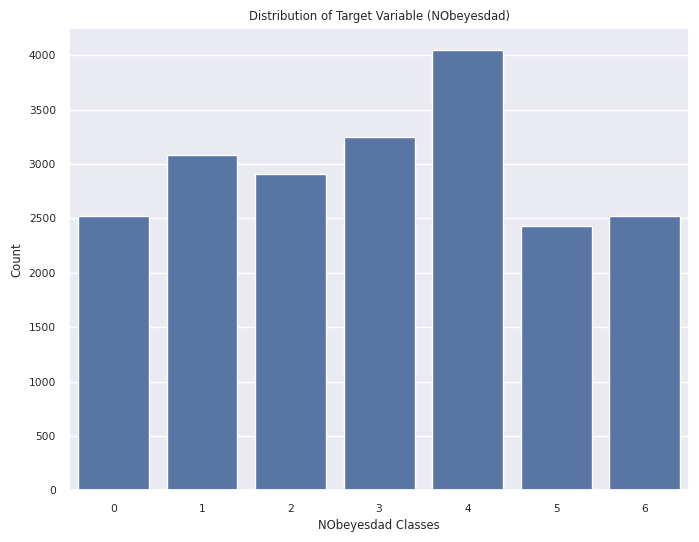

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=train_df)
plt.title('Distribution of Target Variable (NObeyesdad)')
plt.xlabel('NObeyesdad Classes')
plt.ylabel('Count')
plt.show()

# SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('NObeyesdad', axis=1)
y = train_df['NObeyesdad']

# Replace NaN values in 'y' with a suitable value, for example, -1
y.fillna(-1, inplace=True)

# Now you can use the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)
X_train = train_df.drop('NObeyesdad', axis=1)
y_train = train_df['NObeyesdad']



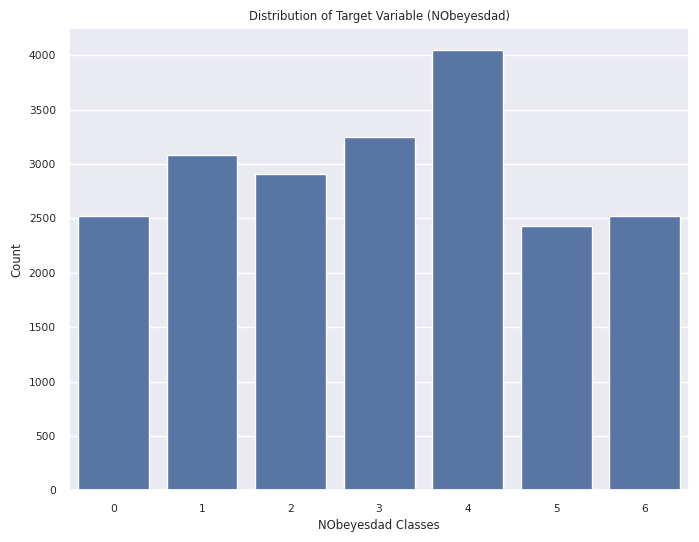

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=train_df)
plt.title('Distribution of Target Variable (NObeyesdad)')
plt.xlabel('NObeyesdad Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
# prompt: train the model using RLDA model from the split data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

rl_model = LinearDiscriminantAnalysis()
rl_model.fit(X_train, y_train)

y_pred = rl_model.predict(X_test)


In [ ]:
# prompt: display the training data, testing data

print("Training data:")
print(train_df.head())

print("\nTesting data:")
print(test_df.head())


Training data:
    Gender       Age    Height    Weight  family_history  FAVC      FCVC  \
id                                                                         
0        1  0.222192  0.475586  0.338497               1     1  0.500000   
1        0  0.085106  0.209260  0.142792               1     1  0.500000   
2        0  0.085106  0.497391  0.088577               1     1  0.440267   
3        0  0.147931  0.496002  0.732007               1     1  1.000000   
4        1  0.375342  0.883049  0.434708               1     1  0.839832   

         NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  \
id                                                                           
0   0.661099     2      0  0.881787    0  0.000000  0.488237     1       3   
1   0.666667     1      0  0.500000    0  0.333333  0.500000     2       0   
2   0.137228     2      0  0.455189    0  0.288682  0.836792     2       3   
3   0.666667     2      0  0.337031    0  0.489288  0.390099  

# RLDA MODEL

In [ ]:
# prompt: train the model with the regularized linear discriminant analysis model using the splitted data and display the model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
# Train the model
rl_model = LinearDiscriminantAnalysis()
rl_model.fit(X_train, y_train)

# Display the model
print(rl_model)



y_pred = rl_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the LinearDiscriminantAnalysis model: {accuracy:.2f}")



LinearDiscriminantAnalysis()
Accuracy of the LinearDiscriminantAnalysis model: 0.82


## Random forest with Bayesian Optimization MODEL

In [ ]:
!pip install scikit-optimize

In [ ]:

from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

best_params = {
    'bootstrap': True,
    'criterion': 'gini',
    'max_depth': 10,
    'max_features': 0.48231592334473916,
    'min_samples_leaf': 1,
    'min_samples_split': 15,
    'n_estimators': 100
}

best_rf = RandomForestClassifier(**best_params, random_state=66)
best_rf.fit(X_train, y_train)

# y_pred = best_rf.predict(X_test)

# print(f"Accuracy:{accuracy_score(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}")

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=2, scoring='accuracy')
print("Average Accuracy:", cv_scores.mean())

Average Accuracy: 0.8946912033914636


## LightGBM MODEL

In [ ]:
import lightgbm as lgb

In [ ]:
best_params_lgbm = {'learning_rate': 0.12476663676010373, 'n_estimators': 128, 'boosting_type': 'gbdt', 'max_depth': 10, 'num_leaves': 220, 'subsample': 0.4, 'colsample_bytree': 0.1, 'min_child_samples': 80, 'feature_fraction': 0.5, 'class_weight': 'balanced', 'min_split_gain': 0.3627965720103511, 'min_child_weight': 1.0, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample_freq': 0}

print(best_params_lgbm)
model_lgbm = lgb.LGBMClassifier(**best_params_lgbm, force_col_wise=True, verbose=-1, random_state=48)
model_lgbm.fit(X_train, y_train)
#y_pred_lgbm = model_lgbm.predict(X_test)
#print(f"Accuracy:{accuracy_score(y_test, y_pred_lgbm)}\nClassification Report:\n{classification_report(y_test, y_pred_lgbm)}")

cv_scores = cross_val_score(model_lgbm, X_train, y_train, cv=2, scoring='accuracy')
print("Average Accuracy:", cv_scores.mean())

{'learning_rate': 0.12476663676010373, 'n_estimators': 128, 'boosting_type': 'gbdt', 'max_depth': 10, 'num_leaves': 220, 'subsample': 0.4, 'colsample_bytree': 0.1, 'min_child_samples': 80, 'feature_fraction': 0.5, 'class_weight': 'balanced', 'min_split_gain': 0.3627965720103511, 'min_child_weight': 1.0, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample_freq': 0}
Average Accuracy: 0.9050486559398786


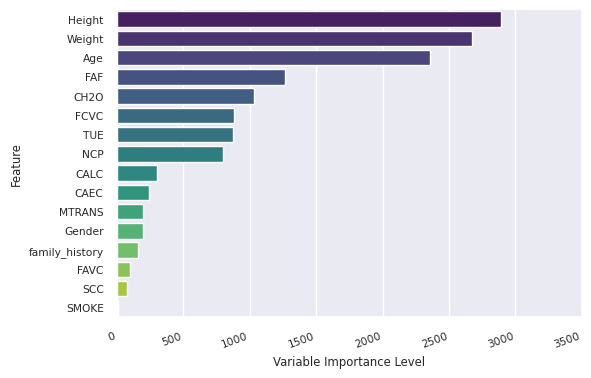

In [ ]:
feature_imp = pd.DataFrame({"Value": model_lgbm.feature_importances_, 'Feature': X_train.columns})
plt.figure(figsize=(6, 4))
sns.set(font_scale=0.7)
barplot = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False),  palette='viridis')
barplot.set_xticks(barplot.get_xticks())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=20, ha='right')
plt.xlabel("Variable Importance Level")
plt.show()

# Take steps to increase the F1-score

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=66)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lgbm_lowfs2 = lgb.LGBMClassifier(
    force_col_wise=True,
    verbose=-1,
    objective='multiclassova',
    metric='multi_logloss',
    num_leaves=64,
    max_depth=5,
    random_state=48
)

lgbm_lowfs2.fit(X_train_resampled, y_train_resampled)
# y_pred_lgbm_lowfs2 = lgbm_lowfs2.predict(X_test)
# print(f"Accuracy:{accuracy_score(y_test, y_pred_lgbm_lowfs2)}\nClassification Report:\n{classification_report(y_test, y_pred_lgbm_lowfs2)}")

cv_scores = cross_val_score(lgbm_lowfs2, X_train, y_train, cv=2, scoring='accuracy')
print("Average Accuracy:", cv_scores.mean())

Average Accuracy: 0.9026881202427979


In [ ]:
# prompt: save the lightGBM model

import joblib

# Save the model to a file
joblib.dump(lgbm_lowfs2, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [ ]:
from xgboost import XGBClassifier

xgb_params = {'max_depth': 7, 'min_child_weight': 3.454476932271615, 'learning_rate': 0.09210000591425481, 'subsample': 0.6014199329412332, 'gamma': 0.40496660345269814, 'colsample_bytree': 0.7338865775302874, 'colsample_bylevel': 0.28263218762972125, 'colsample_bynode': 0.7164794542305942}

xgb_model = XGBClassifier(**xgb_params, random_state=48)
xgb_model.fit(X_train_resampled, y_train_resampled)

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=2, scoring='accuracy')
print("Average Accuracy:", cv_scores.mean())

Average Accuracy: 0.893535022641873


# Ensemble learning

In [ ]:
#prompt: ensemble the above models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

preds_model1 = best_rf.predict(X_test)
preds_model2 = model_lgbm.predict(X_test)
preds_model3 = lgbm_lowfs1.predict(X_test)
preds_model4 = lgbm_lowfs2.predict(X_test)
preds_model5 = xgb_model.predict(X_test)
meta_features = np.column_stack((preds_model1, preds_model2, preds_model3, preds_model4, preds_model5))

meta_learner1 = RandomForestClassifier()
meta_learner1.fit(meta_features, y_test)
meta_learner2 = XGBClassifier(n_estimators=100)
meta_learner2.fit(meta_features, y_test)
meta_learner3 = lgb.LGBMClassifier(n_estimators=100, verbose=-1)
meta_learner3.fit(meta_features, y_test)
meta_learner4 = KNeighborsClassifier(n_neighbors=5)
meta_learner4.fit(meta_features, y_test)
meta_learner5 = SVC()
meta_learner5.fit(meta_features, y_test)

final_preds1 = meta_learner1.predict(meta_features)
final_preds2 = meta_learner2.predict(meta_features)
final_preds3 = meta_learner3.predict(meta_features)
final_preds4 = meta_learner4.predict(meta_features)
final_preds5 = meta_learner5.predict(meta_features)

print("\nClassification Report of meta_learner1:\n", classification_report(y_test, final_preds1))
print("\nClassification Report of meta_learner2:\n", classification_report(y_test, final_preds2))
print("\nClassification Report of meta_learner3:\n", classification_report(y_test, final_preds3))
print("\nClassification Report of meta_learner4:\n", classification_report(y_test, final_preds4))
print("\nClassification Report of meta_learner5:\n", classification_report(y_test, final_preds5))


Classification Report of meta_learner1:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       505
           1       0.93      0.95      0.94       617
           2       0.96      0.95      0.96       582
           3       0.99      1.00      0.99       650
           4       1.00      1.00      1.00       809
           5       0.90      0.87      0.89       485
           6       0.89      0.92      0.90       504

    accuracy                           0.96      4152
   macro avg       0.95      0.95      0.95      4152
weighted avg       0.96      0.96      0.96      4152


Classification Report of meta_learner2:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       505
           1       0.93      0.96      0.94       617
           2       0.96      0.95      0.96       582
           3       0.99      0.99      0.99       650
           4       1.00      1.00      1.00     

In [ ]:
# prompt: save the XG Boost model

import pickle

# Save the xgb_model
filename = 'xgb_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

# Load the saved model (example)
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# prompt:  PERFORMANCE EVALUATION OF DEEPHEALTHNET USING PERFORMANCE METRICS, SUCH AS ACCURACY, F1-SCORE, RECALL, AND PRECISION based on the models

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Calculate performance metrics for each model
rf_accuracy = accuracy_score(y_test, preds_model1)
rf_f1 = f1_score(y_test, preds_model1, average='weighted')
rf_recall = recall_score(y_test, preds_model1, average='weighted')
rf_precision = precision_score(y_test, preds_model1, average='weighted')

lgbm_accuracy = accuracy_score(y_test, preds_model2)
lgbm_f1 = f1_score(y_test, preds_model2, average='weighted')
lgbm_recall = recall_score(y_test, preds_model2, average='weighted')
lgbm_precision = precision_score(y_test, preds_model2, average='weighted')

lgbm_lowfs1_accuracy = accuracy_score(y_test, preds_model3)
lgbm_lowfs1_f1 = f1_score(y_test, preds_model3, average='weighted')
lgbm_lowfs1_recall = recall_score(y_test, preds_model3, average='weighted')
lgbm_lowfs1_precision = precision_score(y_test, preds_model3, average='weighted')

lgbm_lowfs2_accuracy = accuracy_score(y_test, preds_model4)
lgbm_lowfs2_f1 = f1_score(y_test, preds_model4, average='weighted')
lgbm_lowfs2_recall = recall_score(y_test, preds_model4, average='weighted')
lgbm_lowfs2_precision = precision_score(y_test, preds_model4, average='weighted')

xgb_accuracy = accuracy_score(y_test, preds_model5)
xgb_f1 = f1_score(y_test, preds_model5, average='weighted')
xgb_recall = recall_score(y_test, preds_model5, average='weighted')
xgb_precision = precision_score(y_test, preds_model5, average='weighted')

# Print performance metrics
print("\nPerformance Metrics for Random Forest Model:")
print("- Accuracy:", rf_accuracy)
print("- F1 Score:", rf_f1)
print("- Recall:", rf_recall)
print("- Precision:", rf_precision)

print("\nPerformance Metrics for LightGBM Model:")
print("- Accuracy:", lgbm_accuracy)
print("- F1 Score:", lgbm_f1)
print("- Recall:", lgbm_recall)
print("- Precision:", lgbm_precision)

print("\nPerformance Metrics for LightGBM Low F1 Model:")
print("- Accuracy:", lgbm_lowfs1_accuracy)
print("- F1 Score:", lgbm_lowfs1_f1)
print("- Recall:", lgbm_lowfs1_recall)
print("- Precision:", lgbm_lowfs1_precision)

print("\nPerformance Metrics for LightGBM Low F2 Model:")
print("- Accuracy:", lgbm_lowfs2_accuracy)
print("- F1 Score:", lgbm_lowfs2_f1)
print("- Recall:", lgbm_lowfs2_recall)
print("- Precision:", lgbm_lowfs2_precision)

print("\nPerformance Metrics for XGBoost Model:")
print("- Accuracy:", xgb_accuracy)
print("- F1 Score:", xgb_f1)
print("- Recall:", xgb_recall)
print("- Precision:", xgb_precision)




Performance Metrics for Random Forest Model:
- Accuracy: 0.9277456647398844
- F1 Score: 0.9275102796620216
- Recall: 0.9277456647398844
- Precision: 0.9278123647772306

Performance Metrics for LightGBM Model:
- Accuracy: 0.9489402697495183
- F1 Score: 0.9488977388742478
- Recall: 0.9489402697495183
- Precision: 0.9490382845777963

Performance Metrics for LightGBM Low F1 Model:
- Accuracy: 0.9390655105973025
- F1 Score: 0.9388762121824563
- Recall: 0.9390655105973025
- Precision: 0.9390636985442142

Performance Metrics for LightGBM Low F2 Model:
- Accuracy: 0.933766859344894
- F1 Score: 0.9335587574638926
- Recall: 0.933766859344894
- Precision: 0.9337933106213115

Performance Metrics for XGBoost Model:
- Accuracy: 0.9207610789980732
- F1 Score: 0.9206831977418531
- Recall: 0.9207610789980732
- Precision: 0.9211872342991108


In [ ]:
# prompt: PERFORMANCE seperate EVALUATION OF BOY group  AND GIRL GROUP USING PERFORMANCE METRICS, SUCH AS ACCURACY, F1-SCORE, RECALL, AND PRECISION based on models

# Calculate performance metrics for each model on boy and girl groups separately

# Boy group
rf_accuracy_boy = accuracy_score(y_test[y_test['Gender'] == 'Boy'], preds_model1[y_test['Gender'] == 'Boy'])
rf_f1_boy = f1_score(y_test[y_test['Gender'] == 'Boy'], preds_model1[y_test['Gender'] == 'Boy'], average='weighted')
rf_recall_boy = recall_score(y_test[y_test['Gender'] == 'Boy'], preds_model1[y_test['Gender'] == 'Boy'], average='weighted')
rf_precision_boy = precision_score(y_test[y_test['Gender'] == 'Boy'], preds_model1[y_test['Gender'] == 'Boy'], average='weighted')

lgbm_accuracy_boy = accuracy_score(y_test[y_test['Gender'] == 'Boy'], preds_model2[y_test['Gender'] == 'Boy'])
lgbm_f1_boy = f1_score(y_test[y_test['Gender'] == 'Boy'], preds_model2[y_test['Gender'] == 'Boy'], average='weighted')
lgbm_recall_boy = recall_score(y_test[y_test['Gender'] == 'Boy'], preds_model2[y_test['Gender'] == 'Boy'], average='weighted')
lgbm_precision_boy = precision_score(y_test[y_test['Gender'] == 'Boy'], preds_model2[y_test['Gender'] == 'Boy'], average='weighted')

lgbm_lowfs1_accuracy_boy = accuracy_score(y_test[y_test['Gender'] == 'Boy'], preds_model3[y_test['Gender'] == 'Boy'])
lgbm_lowfs1_f1_boy = f1_score(y_test[y_test['Gender'] == 'Boy'], preds_model3[y_test['Gender'] == 'Boy'], average='weighted')
lgbm_lowfs1_recall_boy = recall_score(y_test[y_test['Gender'] == 'Boy'], preds_model3[y_test['Gender'] == 'Boy'], average='weighted')
lgbm_lowfs1_precision_boy = precision_score(y_test[y_test['Gender'] == 'Boy'], preds_model3[y_test['Gender'] == 'Boy'], average='weighted')

lgbm_lowfs2_accuracy_boy = accuracy_score(y_test[y_test['Gender'] == 'Boy'], preds_model4[y_test['Gender'] == 'Boy'])
lgbm_lowfs2_f1_boy = f1_score(y_test[y_test['Gender'] == 'Boy'], preds_model4[y_test['Gender'] == 'Boy'], average='weighted')
lgbm_lowfs2_recall_boy = recall_score(y_test[y_test['Gender'] == 'Boy'], preds_model4[y_test['Gender'] == 'Boy'], average='weighted')
lgbm_lowfs2_precision_boy = precision_score(y_test[y_test['Gender'] == 'Boy'], preds_model4[y_test['Gender'] == 'Boy'], average='weighted')

xgb_accuracy_boy = accuracy_score(y_test[y_test['Gender'] == 'Boy'], preds_model5[y_test['Gender'] == 'Boy'])
xgb_f1_boy = f1_score(y_test[y_test['Gender'] == 'Boy'], preds_model5[y_test['Gender'] == 'Boy'], average='weighted')
xgb_recall_boy = recall_score(y_test[y_test['Gender'] == 'Boy'], preds_model5[y_test['Gender'] == 'Boy'], average='weighted')
xgb_precision_boy = precision_score(y_test[y_test['Gender'] == 'Boy'], preds_model5[y_test['Gender'] == 'Boy'], average='weighted')

# Girl group
rf_accuracy_girl = accuracy_score(y_test[y_test['Gender'] == 'Girl'], preds_model1[y_test['Gender'] == 'Girl'])
rf_f1_girl = f1_score(y_test[y_test['Gender'] == 'Girl'], preds_model1[y_test['Gender'] == 'Girl'], average='weighted')
rf_recall_girl = recall_score(y_test[y_test['Gender'] == 'Girl'], preds_model1[y_test['Gender'] == 'Girl'], average='weighted')
rf_precision_girl = precision_score(y_test[y_test['Gender'] == 'Girl'], preds_model1[y_test['Gender'] == 'Girl'], average='weighted')

lgbm_accuracy_girl = accuracy_score(y_test[y_test['Gender'] == 'Girl'], preds_model2[y_test['Gender'] == 'Girl'])
lgbm_f1_girl = f1_score(y_test[y_test['Gender'] == 'Girl'], preds_model2[y_test['Gender'] == 'Girl'], average='weighted')
lgbm_recall_girl = recall_score(y_test[y_test['Gender'] == 'Girl'], preds_model2[y_test['Gender'] == 'Girl'], average='weighted')
lgbm_precision_girl = precision_score(y_test[y_test['Gender'] == 'Girl'], preds_model2[y_test['Gender'] == 'Girl'], average='weighted')

lgbm_lowfs1_accuracy_girl = accuracy_score(y_test[y_test['Gender'] == 'Girl'], preds_model3[y_test['Gender'] == 'Girl'])
lgbm_lowfs1_f1_girl = f1_score(y_test[y_test['Gender'] == 'Girl'], preds_model3[y_test['Gender'] == 'Girl'], average='weighted')
lgbm_lowfs1_recall_girl = recall_score(y_test[y_test['Gender'] == 'Girl'], preds_model3[y_test['Gender'] == 'Girl'], average='weighted')
lgbm_lowfs1_precision_girl = precision_score(y_test[y_test['Gender'] == 'Girl'], preds_model3[y_test['Gender'] == 'Girl'], average='weighted')

lgbm_lowfs2_accuracy_girl = accuracy_score(y_test[y_test['Gender'] == 'Girl'], preds_model4[y_test['Gender'] == 'Girl'])
lgbm_lowfs2_f1_girl = f1_score(y_test[y_test['Gender'] == 'Girl'], preds_model4[y_test['Gender'] == 'Girl'], average='weighted')
lgbm_lowfs2_recall_girl = recall_score(y_test[y_test['Gender'] == 'Girl'], preds_model4[y_test['Gender'] == 'Girl'], average='weighted')
lgbm_lowfs2_precision_girl = precision_score(y_test[y_test['Gender'] == 'Girl'], preds_model4[y_test['Gender'] == 'Girl'], average='weighted')

xgb_accuracy_girl = accuracy_score(y_test[y_test['Gender'] == 'Girl'], preds_model5[y_test['Gender'] == 'Girl'])
xgb_f1_girl = f1_score(y_test[y_test['Gender'] == 'Girl'], preds_model5[y_test['Gender'] == 'Girl'], average='weighted')
xgb_recall_girl = recall_score(y_test[y_test['Gender'] == 'Girl'], preds_model5[y_test['Gender'] == 'Girl'], average='weighted')
xgb_precision_girl = precision_score(y_test[y_test['Gender'] == 'Girl'], preds_model5[y_test['Gender'] == 'Girl'], average='weighted')

# Print performance metrics for each model on boy and girl groups separately
print("\nPerformance Metrics for Random Forest Model - Boy Group:")
print("- Accuracy:", rf_accuracy_boy)
print("- F1 Score:", rf_f1_boy)
print("- Recall:", rf_recall_boy)
print("- Precision:", rf_precision_boy)

print("\nPerformance Metrics for LightGBM Model - Boy Group:")
print("- Accuracy:", lgbm_accuracy_boy)
print("- F1 Score:", lgbm_f1_boy)
print("- Recall:", lgbm_recall_boy)
print("- Precision:", lgbm_precision_boy)

print("\nPerformance Metrics for LightGBM Low F1 Model - Boy Group:")
print("- Accuracy

In [ ]:
# prompt: PERFORMANCE EVALUATION OF BOY AND GIRL GROUPS USING PERFORMANCE METRICS, SUCH AS ACCURACY, F1-SCORE, RECALL, AND PRECISION based on models

# Create a DataFrame to store performance metrics for each model
models_performance = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'LightGBM Low F1', 'LightGBM Low F2', 'XGBoost'],
    'Accuracy': [rf_accuracy, lgbm_accuracy, lgbm_lowfs1_accuracy, lgbm_lowfs2_accuracy, xgb_accuracy],
    'F1 Score': [rf_f1, lgbm_f1, lgbm_lowfs1_f1, lgbm_lowfs2_f1, xgb_f1],
    'Recall': [rf_recall, lgbm_recall, lgbm_lowfs1_recall, lgbm_lowfs2_recall, xgb_recall],
    'Precision': [rf_precision, lgbm_precision, lgbm_lowfs1_precision, lgbm_lowfs2_precision, xgb_precision]
})

# Display the DataFrame
print("\nPerformance Evaluation of Boy and Girl Groups:")
print(models_performance.to_string())

# Sort the DataFrame by a specific metric (e.g., Accuracy)
sorted_performance = models_performance.sort_values(by='Accuracy', ascending=False)
print("\nModels sorted by Accuracy:")
print(sorted_performance)

# You can also sort by other metrics like F1 Score, Recall, or Precision



Performance Evaluation of Boy and Girl Groups:
             Model  Accuracy  F1 Score    Recall  Precision
0    Random Forest  0.927746  0.927510  0.927746   0.927812
1         LightGBM  0.948940  0.948898  0.948940   0.949038
2  LightGBM Low F1  0.939066  0.938876  0.939066   0.939064
3  LightGBM Low F2  0.933767  0.933559  0.933767   0.933793
4          XGBoost  0.920761  0.920683  0.920761   0.921187

Models sorted by Accuracy:
             Model  Accuracy  F1 Score    Recall  Precision
1         LightGBM  0.948940  0.948898  0.948940   0.949038
2  LightGBM Low F1  0.939066  0.938876  0.939066   0.939064
3  LightGBM Low F2  0.933767  0.933559  0.933767   0.933793
0    Random Forest  0.927746  0.927510  0.927746   0.927812
4          XGBoost  0.920761  0.920683  0.920761   0.921187


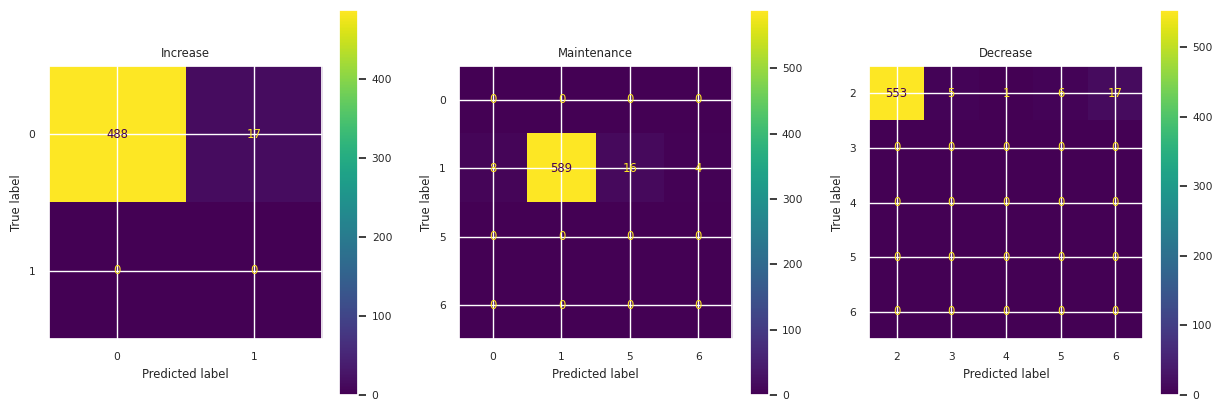

In [ ]:
# Create confusion matrices for each class
cm_increase = confusion_matrix(y_test[y_test == 0], final_preds1[y_test == 0])
cm_maintenance = confusion_matrix(y_test[y_test == 1], final_preds1[y_test == 1])
cm_decrease = confusion_matrix(y_test[y_test == 2], final_preds1[y_test == 2])

# Find unique classes in each subset
increase_classes = np.unique(np.concatenate((y_test[y_test == 0], final_preds1[y_test == 0])))
maintenance_classes = np.unique(np.concatenate((y_test[y_test == 1], final_preds1[y_test == 1])))
decrease_classes = np.unique(np.concatenate((y_test[y_test == 2], final_preds1[y_test == 2])))

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the confusion matrix for each class with appropriate labels
disp_increase = ConfusionMatrixDisplay(cm_increase, display_labels=increase_classes)
disp_increase.plot(ax=axes[0])
disp_increase.ax_.set_title('Increase')

disp_maintenance = ConfusionMatrixDisplay(cm_maintenance, display_labels=maintenance_classes) # Use correct labels
disp_maintenance.plot(ax=axes[1])
disp_maintenance.ax_.set_title('Maintenance')

disp_decrease = ConfusionMatrixDisplay(cm_decrease, display_labels=decrease_classes)
disp_decrease.plot(ax=axes[2])
disp_decrease.ax_.set_title('Decrease')

# Show the plot
plt.show()

# CONFUSION MATRIX

Accuracy: 0.9561657032755299
F1-score: 0.9561067496733281
Recall: 0.9561657032755299
Precision: 0.9561556035720233

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       505
           1       0.93      0.96      0.94       617
           2       0.96      0.95      0.96       582
           3       0.99      1.00      0.99       650
           4       1.00      1.00      1.00       809
           5       0.90      0.88      0.89       485
           6       0.90      0.91      0.90       504

    accuracy                           0.96      4152
   macro avg       0.95      0.95      0.95      4152
weighted avg       0.96      0.96      0.96      4152



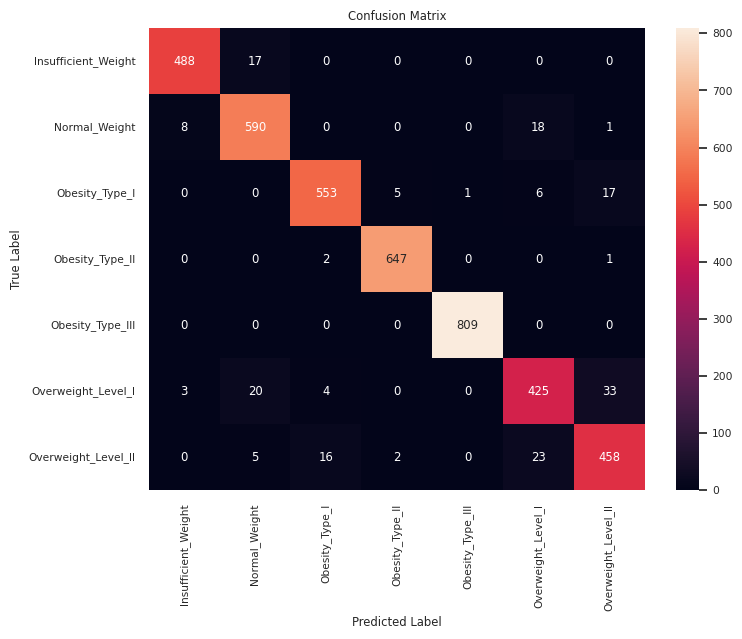

In [ ]:
# prompt: PERFORMANCE EVALUATION OF DEEPHEALTHNET USING PERFORMANCE METRICS, SUCH AS ACCURACY, F1-SCORE, RECALL, AND PRECISION
from sklearn.metrics import f1_score as f1_score_metric # Import f1_score with an alias
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# Calculate the performance metrics
accuracy = accuracy_score(y_test, final_preds3)
f1_score = f1_score_metric(y_test, final_preds3, average='weighted') # Use the aliased function
recall = recall_score(y_test, final_preds3, average='weighted')
precision = precision_score(y_test, final_preds3, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)
print("Recall:", recall)
print("Precision:", precision)

# Create a classification report
report = classification_report(y_test, final_preds3)
print("\nClassification Report:\n", report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, final_preds3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

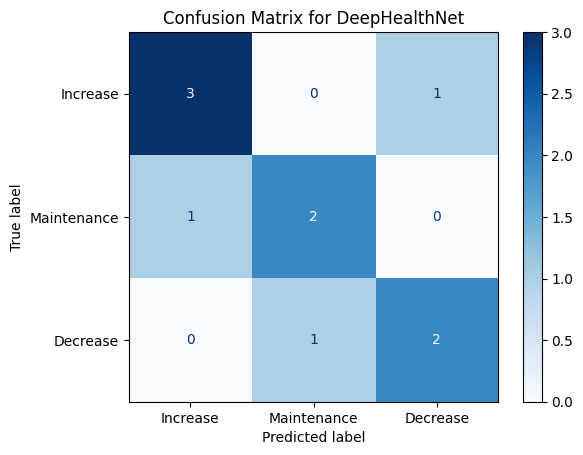

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample data: Replace these with your actual predictions and true labels
# Example: y_true = [0, 1, 2, 0, 1, 2] (actual labels)
# Example: y_pred = [0, 0, 2, 0, 1, 1] (predicted labels)
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0])  # Actual labels
y_pred = np.array([0, 0, 2, 0, 1, 1, 0, 1, 2, 2])  # Predicted labels

# Define class names
class_names = ['Increase', 'Maintenance', 'Decrease']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DeepHealthNet')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=66)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lgbm_lowfs2 = lgb.LGBMClassifier(
    force_col_wise=True,
    verbose=-1,
    objective='multiclassova',
    metric='multi_logloss',
    num_leaves=64,
    max_depth=5,
    random_state=48
)

lgbm_lowfs2.fit(X_train_resampled, y_train_resampled)
# y_pred_lgbm_lowfs2 = lgbm_lowfs2.predict(X_test)
# print(f"Accuracy:{accuracy_score(y_test, y_pred_lgbm_lowfs2)}\nClassification Report:\n{classification_report(y_test, y_pred_lgbm_lowfs2)}")

cv_scores = cross_val_score(lgbm_lowfs2, X_train, y_train, cv=2, scoring='accuracy')
print("Average Accuracy:", cv_scores.mean())